### Objective
- to use NLP on tweets to find the top 3 trending topics related to Covid and corresponding sentiments and insights.

Task 1 
- use your data engineering skills to download tweets data 
- apply for Twitter developer account https://developer.twitter.com/en/apply-for-access (Links to an external site.)

Task 2 
- familiarize with NLP at https://nlp.johnsnowlabs.com/ (Links to an external site.) 
- the license details to use NLP for healthcare is given below

Deliverables:
- EDA: analyze and plot your data
- Topics: use NLP to find the top 3 trending topics related to Covid-19
- Sentiments: use NLP to understand the sentiments of the top 3 topics
- Insights: use NLP to discover insights/information on the top 3 topics

Submissions:
- your code
- your PPT that will be presented in class

### Step 0: Clean Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /Users/Xingkang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Xingkang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
tweet =  pd.read_csv('Covid_Tweets.csv')

In [3]:
tweet.head(10)

,Tweets
0,: The number of people in Virginia who have be...
1,WE DO NOT HAVE TO LIVE WITH COVID-19All of the...
2,The point is that more than % of this bill sho...
3,: You just stepped all over your entire show o...
4,: People who work full time should be able to ...
5,: RT if you agree Democrats should immediately...
6,: Update: Weve secured million doses of AstraZ...
7,: [ENG TRANSLATION]tw // racisma german radio ...
8,: A German radio presenter equating the South ...
9,He should have a cute little COVID hat and mask.


In [4]:
# import string
# string.punctuation

# Normalization

import re

def normalization(text):
    text = text.lower()
    text = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)

    #nopunct = [w for w in words if w not in string.punctuation]
    return text

In [5]:
# Remove Stopwords

def remove_stopwords(text):
    words = word_tokenize(text)
    nostopwords = [w for w in words if w not in stop_words]
    return (' '.join(nostopwords))

In [6]:
tweet['Cleaned_Tweets'] = tweet['Tweets'].apply(lambda x: normalization(x))
tweet['Cleaned_Tweets'] = tweet['Cleaned_Tweets'].apply(lambda x: remove_stopwords(x))
tweet['Cleaned_Tokens'] = tweet['Cleaned_Tweets'].apply(lambda x: word_tokenize(x))

In [7]:
tweet.head(10)

,Tweets,Cleaned_Tweets,Cleaned_Tokens
0,: The number of people in Virginia who have be...,number people virginia fully vaccinated surpas...,"[number, people, virginia, fully, vaccinated, ..."
1,WE DO NOT HAVE TO LIVE WITH COVID-19All of the...,live covid19all deaths next months preventable...,"[live, covid19all, deaths, next, months, preve..."
2,The point is that more than % of this bill sho...,point bill go covid going noncovid garbage rep...,"[point, bill, go, covid, going, noncovid, garb..."
3,: You just stepped all over your entire show o...,stepped entire show way door vaccine far scari...,"[stepped, entire, show, way, door, vaccine, fa..."
4,: People who work full time should be able to ...,people work full time able make living wage do...,"[people, work, full, time, able, make, living,..."
5,: RT if you agree Democrats should immediately...,rt agree democrats immediately remove everythi...,"[rt, agree, democrats, immediately, remove, ev..."
6,: Update: Weve secured million doses of AstraZ...,update weve secured million doses astrazenecas...,"[update, weve, secured, million, doses, astraz..."
7,: [ENG TRANSLATION]tw // racisma german radio ...,eng translationtw racisma german radio host ta...,"[eng, translationtw, racisma, german, radio, h..."
8,: A German radio presenter equating the South ...,german radio presenter equating south korean b...,"[german, radio, presenter, equating, south, ko..."
9,He should have a cute little COVID hat and mask.,cute little covid hat mask,"[cute, little, covid, hat, mask]"


### Step 1: EDA

In [8]:
# Create a function to get the polarity (how positive and negative the tweet is)

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [9]:
tweet['Polarity'] = tweet['Cleaned_Tweets'].apply(getPolarity)

In [10]:
tweet.head(10)

,Tweets,Cleaned_Tweets,Cleaned_Tokens,Polarity
0,: The number of people in Virginia who have be...,number people virginia fully vaccinated surpas...,"[number, people, virginia, fully, vaccinated, ...",0.000000
1,WE DO NOT HAVE TO LIVE WITH COVID-19All of the...,live covid19all deaths next months preventable...,"[live, covid19all, deaths, next, months, preve...",0.068182
2,The point is that more than % of this bill sho...,point bill go covid going noncovid garbage rep...,"[point, bill, go, covid, going, noncovid, garb...",0.000000
3,: You just stepped all over your entire show o...,stepped entire show way door vaccine far scari...,"[stepped, entire, show, way, door, vaccine, fa...",0.050000
4,: People who work full time should be able to ...,people work full time able make living wage do...,"[people, work, full, time, able, make, living,...",0.118750
5,: RT if you agree Democrats should immediately...,rt agree democrats immediately remove everythi...,"[rt, agree, democrats, immediately, remove, ev...",0.000000
6,: Update: Weve secured million doses of AstraZ...,update weve secured million doses astrazenecas...,"[update, weve, secured, million, doses, astraz...",0.500000
7,: [ENG TRANSLATION]tw // racisma german radio ...,eng translationtw racisma german radio host ta...,"[eng, translationtw, racisma, german, radio, h...",-0.350000
8,: A German radio presenter equating the South ...,german radio presenter equating south korean b...,"[german, radio, presenter, equating, south, ko...",-0.100000
9,He should have a cute little COVID hat and mask.,cute little covid hat mask,"[cute, little, covid, hat, mask]",0.156250


In [11]:
tweet[tweet.Polarity==0]

,Tweets,Cleaned_Tweets,Cleaned_Tokens,Polarity
0,: The number of people in Virginia who have be...,number people virginia fully vaccinated surpas...,"[number, people, virginia, fully, vaccinated, ...",0.0
2,The point is that more than % of this bill sho...,point bill go covid going noncovid garbage rep...,"[point, bill, go, covid, going, noncovid, garb...",0.0
5,: RT if you agree Democrats should immediately...,rt agree democrats immediately remove everythi...,"[rt, agree, democrats, immediately, remove, ev...",0.0
10,: Ivory Coast has become the second country in...,ivory coast become second country world receiv...,"[ivory, coast, become, second, country, world,...",0.0
16,": In order to preserve the , must keep $15 min...",order preserve must keep 15 min wage covid rel...,"[order, preserve, must, keep, 15, min, wage, c...",0.0
...,...,...,...,...
11986,: The Final Push to End the Coronavirus Pandem...,final push end coronavirus pandemic us,"[final, push, end, coronavirus, pandemic, us]",0.0
11987,: Jeremy Lin: Being a -year NBA veteran doesnt...,jeremy lin year nba veteran doesnt protect cal...,"[jeremy, lin, year, nba, veteran, doesnt, prot...",0.0
11990,: The behavioural scientists are worried they'...,behavioural scientists worried theyre losing r...,"[behavioural, scientists, worried, theyre, los...",0.0
11992,The Final Push to End the Coronavirus Pandemic...,final push end coronavirus pandemic us,"[final, push, end, coronavirus, pandemic, us]",0.0


In [12]:
tweet.loc[tweet['Polarity']>0,'Sentiment'] = 'Positive'
tweet.loc[tweet['Polarity']==0,'Sentiment'] = 'Neutral'
tweet.loc[tweet['Polarity']<0,'Sentiment'] = 'Negative'

In [13]:
tweet.head(10)

,Tweets,Cleaned_Tweets,Cleaned_Tokens,Polarity,Sentiment
0,: The number of people in Virginia who have be...,number people virginia fully vaccinated surpas...,"[number, people, virginia, fully, vaccinated, ...",0.000000,Neutral
1,WE DO NOT HAVE TO LIVE WITH COVID-19All of the...,live covid19all deaths next months preventable...,"[live, covid19all, deaths, next, months, preve...",0.068182,Positive
2,The point is that more than % of this bill sho...,point bill go covid going noncovid garbage rep...,"[point, bill, go, covid, going, noncovid, garb...",0.000000,Neutral
3,: You just stepped all over your entire show o...,stepped entire show way door vaccine far scari...,"[stepped, entire, show, way, door, vaccine, fa...",0.050000,Positive
4,: People who work full time should be able to ...,people work full time able make living wage do...,"[people, work, full, time, able, make, living,...",0.118750,Positive
5,: RT if you agree Democrats should immediately...,rt agree democrats immediately remove everythi...,"[rt, agree, democrats, immediately, remove, ev...",0.000000,Neutral
6,: Update: Weve secured million doses of AstraZ...,update weve secured million doses astrazenecas...,"[update, weve, secured, million, doses, astraz...",0.500000,Positive
7,: [ENG TRANSLATION]tw // racisma german radio ...,eng translationtw racisma german radio host ta...,"[eng, translationtw, racisma, german, radio, h...",-0.350000,Negative
8,: A German radio presenter equating the South ...,german radio presenter equating south korean b...,"[german, radio, presenter, equating, south, ko...",-0.100000,Negative
9,He should have a cute little COVID hat and mask.,cute little covid hat mask,"[cute, little, covid, hat, mask]",0.156250,Positive


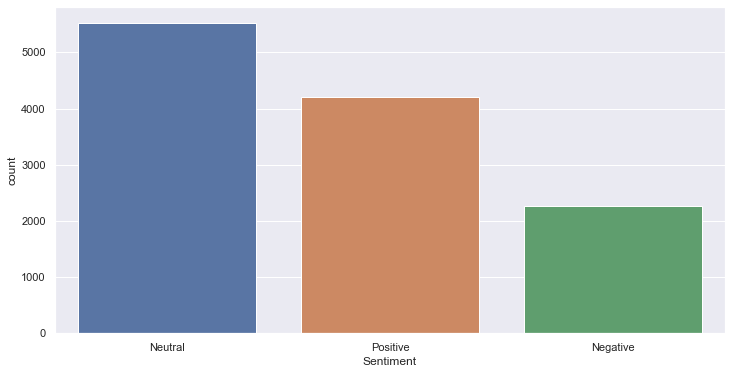

In [14]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
sns.countplot(x='Sentiment',data=tweet)

#### Method 1: Use TF-IDF, TruncatedSVD, and KMeans Clustering

In [21]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Feature Transformation

tfidf_vectorizer = TfidfVectorizer(max_features= 1000000,stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweet.Tweets)

In [17]:
# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

In [18]:
train = svd.fit_transform(tfidf)

/Users/Xingkang/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


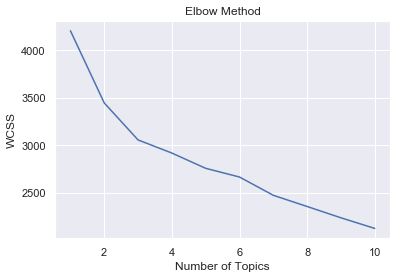

In [55]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(train)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Topics')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [60]:
# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)
 
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(tfidf)

# Calculate the cluster labels: labels
labels = pipeline.predict(tfidf)
print(len(labels))

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'Group': labels,'Text':tweet.Tweets})

# Display df sorted by cluster label
print(df.sort_values('Group'))

/Users/Xingkang/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


12000
      Group                                               Text
8999      0  : "Being a year NBA veteran doesn't protect me...
9527      0  : Jeremy Lin: Being a -year NBA veteran doesnt...
9530      0  : "Being a year NBA veteran doesn't protect me...
9540      0  : Jeremy Lin: Being a -year NBA veteran doesnt...
9545      0  : "Being a year NBA veteran doesn't protect me...
...     ...                                                ...
2374      2  : RT if you agree Democrats should immediately...
2347      2  : RT if you agree Democrats should immediately...
2341      2  : RT if you agree Democrats should immediately...
2722      2  : RT if you agree Democrats should immediately...
2999      2  : RT if you agree Democrats should immediately...

[12000 rows x 2 columns]


In [61]:
df['Group'].value_counts()

/Users/Xingkang/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1    10540
0     1041
2      419
Name: Group, dtype: int64

In [62]:
from wordcloud import WordCloud

/Users/Xingkang/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/Xingkang/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


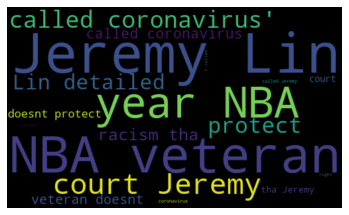

1041


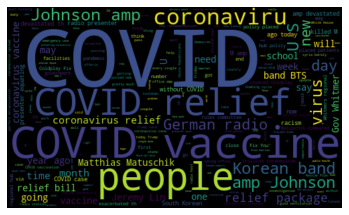

10540


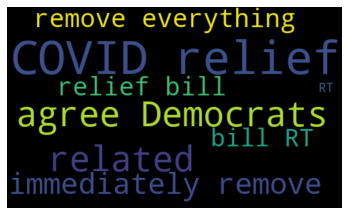

419


In [63]:
for group in range(0,df['Group'].nunique()):
    allwords = ' '.join([text for text in df[df['Group']==group]['Text']])
    wordCloud = WordCloud(width=500, height=300,random_state=22,max_font_size=120).generate(allwords)
    
    plt.imshow(wordCloud,interpolation='bilinear')
    plt.axis('off')
    #plt.savefig('Group {} Word Cloud.png'.format(group))
    plt.show()
    print(len(df[df['Group']==group]))

#### Method 2: Use LDA (Latent Dirichlet Allocation)

In [26]:
tweet['Cleaned_Tokens'].tolist()[:3]

[['number',
  'people',
  'virginia',
  'fully',
  'vaccinated',
  'surpassed',
  'number',
  'people',
  'tested',
  'pos'],
 ['live',
  'covid19all',
  'deaths',
  'next',
  'months',
  'preventable',
  'government',
  'choose',
  'act'],
 ['point',
  'bill',
  'go',
  'covid',
  'going',
  'noncovid',
  'garbage',
  'republicans',
  'pissed',
  'well',
  'wake']]

In [27]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Xingkang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [28]:
tweet['POS_Tokens'] = tweet['Cleaned_Tokens'].apply(lambda x: pos_tag(x))

In [29]:
tweet['POS_Tokens'][0]

[('number', 'NN'),
 ('people', 'NNS'),
 ('virginia', 'VBP'),
 ('fully', 'RB'),
 ('vaccinated', 'VBN'),
 ('surpassed', 'JJ'),
 ('number', 'NN'),
 ('people', 'NNS'),
 ('tested', 'VBD'),
 ('pos', 'NN')]

In [30]:
tweet.head()

,Tweets,Cleaned_Tweets,Cleaned_Tokens,Polarity,Sentiment,POS_Tokens
0,: The number of people in Virginia who have be...,number people virginia fully vaccinated surpas...,"[number, people, virginia, fully, vaccinated, ...",0.000000,Neutral,"[(number, NN), (people, NNS), (virginia, VBP),..."
1,WE DO NOT HAVE TO LIVE WITH COVID-19All of the...,live covid19all deaths next months preventable...,"[live, covid19all, deaths, next, months, preve...",0.068182,Positive,"[(live, JJ), (covid19all, NN), (deaths, NNS), ..."
2,The point is that more than % of this bill sho...,point bill go covid going noncovid garbage rep...,"[point, bill, go, covid, going, noncovid, garb...",0.000000,Neutral,"[(point, NN), (bill, NN), (go, VB), (covid, JJ..."
3,: You just stepped all over your entire show o...,stepped entire show way door vaccine far scari...,"[stepped, entire, show, way, door, vaccine, fa...",0.050000,Positive,"[(stepped, VBD), (entire, JJ), (show, NN), (wa..."
4,: People who work full time should be able to ...,people work full time able make living wage do...,"[people, work, full, time, able, make, living,...",0.118750,Positive,"[(people, NNS), (work, VBP), (full, JJ), (time..."


In [31]:
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Xingkang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

In [33]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [34]:
len(tweet['POS_Tokens'])

12000

In [35]:
tweet['Lemmatized_Tokens'] = 0


for i in range(0,len(tweet['POS_Tokens'])):
    tweet['Lemmatized_Tokens'][i] = [lemmatizer.lemmatize(x[0],get_wordnet_pos(x[1])) if get_wordnet_pos(x[1])!='' else x[0] for x in tweet['POS_Tokens'][i]]

/Users/Xingkang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/Xingkang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [36]:
tweet.columns

Index(['Tweets', 'Cleaned_Tweets', 'Cleaned_Tokens', 'Polarity', 'Sentiment',
       'POS_Tokens', 'Lemmatized_Tokens'],
      dtype='object')

In [37]:
#!pip install gensim

In [38]:
import gensim

In [39]:
dictionary = gensim.corpora.Dictionary(list(tweet['Lemmatized_Tokens']))

In [40]:
dictionary

In [41]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 fully
1 number
2 people
3 po
4 surpassed
5 test
6 vaccinate
7 virginia
8 act
9 choose
10 covid19all


In [45]:
bow_corpus = [dictionary.doc2bow(doc) for doc in list(tweet['Lemmatized_Tokens'])]

In [46]:
document_num = 30
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 18 ("covid") appears 1 time.
Word 40 ("hour") appears 1 time.
Word 175 ("us") appears 1 time.
Word 191 ("two") appears 1 time.
Word 243 ("bitch") appears 1 time.
Word 244 ("documentary") appears 1 time.
Word 245 ("double") appears 1 time.
Word 246 ("follow") appears 1 time.
Word 247 ("hit") appears 1 time.
Word 248 ("last") appears 1 time.
Word 249 ("save") appears 1 time.
Word 250 ("week") appears 1 time.


In [47]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 3, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [48]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.033*"coronavirus" + 0.024*"vaccine" + 0.018*"year" + 0.017*"covid19" + 0.015*"call" + 0.014*"racism" + 0.014*"johnson" + 0.012*"us" + 0.012*"protect" + 0.012*"lin"


Topic: 1 
Words: 0.041*"coronavirus" + 0.022*"call" + 0.020*"jeremy" + 0.019*"lin" + 0.019*"court" + 0.014*"year" + 0.013*"doesnt" + 0.013*"nba" + 0.013*"protect" + 0.012*"veteran"


Topic: 2 
Words: 0.049*"covid" + 0.023*"relief" + 0.020*"covid19" + 0.015*"bill" + 0.011*"democrat" + 0.011*"get" + 0.008*"everything" + 0.008*"remove" + 0.008*"band" + 0.008*"th"




In [49]:
#!pip install pyLDAvis

In [50]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=bow_corpus, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [43]:
tweet[tweet['Cleaned_Tweets'].str.contains('vaccine')]

/Users/Xingkang/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweets,Cleaned_Tweets,Cleaned_Tokens,Polarity,Sentiment,POS_Tokens,Lemmatized_Tokens
3,: You just stepped all over your entire show o...,stepped entire show way door vaccine far scari...,"[stepped, entire, show, way, door, vaccine, fa...",0.050000,Positive,"[(stepped, VBD), (entire, JJ), (show, NN), (wa...","[step, entire, show, way, door, vaccine, far, ..."
6,: Update: Weve secured million doses of AstraZ...,update weve secured million doses astrazenecas...,"[update, weve, secured, million, doses, astraz...",0.500000,Positive,"[(update, JJ), (weve, NN), (secured, VBN), (mi...","[update, weve, secure, million, dos, astrazene..."
10,: Ivory Coast has become the second country in...,ivory coast become second country world receiv...,"[ivory, coast, become, second, country, world,...",0.000000,Neutral,"[(ivory, NN), (coast, NN), (become, JJ), (seco...","[ivory, coast, become, second, country, world,..."
17,: Dr. will give us insight for the upcoming Ch...,dr give us insight upcoming chancellors speake...,"[dr, give, us, insight, upcoming, chancellors,...",0.000000,Neutral,"[(dr, NN), (give, VBP), (us, PRP), (insight, J...","[dr, give, us, insight, upcoming, chancellor, ..."
37,: Weve reached some major COVID-19 vaccine mil...,weve reached major covid19 vaccine milestones ...,"[weve, reached, major, covid19, vaccine, miles...",0.270833,Positive,"[(weve, RB), (reached, VBN), (major, JJ), (cov...","[weve, reach, major, covid19, vaccine, milesto..."
...,...,...,...,...,...,...,...
11939,: Black woman created a proven vaccine trackin...,black woman created proven vaccine tracking so...,"[black, woman, created, proven, vaccine, track...",-0.166667,Negative,"[(black, JJ), (woman, NN), (created, VBD), (pr...","[black, woman, create, proven, vaccine, track,..."
11941,Health Canada has approved the Oxford-AstraZen...,health canada approved oxfordastrazeneca covid...,"[health, canada, approved, oxfordastrazeneca, ...",0.050000,Positive,"[(health, NN), (canada, NN), (approved, VBD), ...","[health, canada, approve, oxfordastrazeneca, c..."
11951,: In this piece Im quoted about the California...,piece im quoted california variant suspect vac...,"[piece, im, quoted, california, variant, suspe...",0.600000,Positive,"[(piece, NN), (im, NN), (quoted, VBN), (califo...","[piece, im, quote, california, variant, suspec..."
11968,: BREAKINGVaccine advisers to FDA voted unanim...,breakingvaccine advisers fda voted unanimously...,"[breakingvaccine, advisers, fda, voted, unanim...",0.000000,Neutral,"[(breakingvaccine, NN), (advisers, NNS), (fda,...","[breakingvaccine, adviser, fda, vote, unanimou..."
